# Statistiska beräkningar med CMS' data.

> För mer information om vad CMS är, och varför vi använder oss av dess data kan du läsa *CMS och Open Data*-dokumentet i [denna mapp](https://github.com/cms-opendata-education/cms-jupyter-materials-swedish/tree/main/Verktyg).

Med hjälp av Python kan vi enkelt beräkna statistiska karakteristika, så som medeltal, varians och stanardavvikelse för statistiska datasets. För dessa exempel kommer vi att använda oss av CMS' kollisionsdata i filen _Jpsimumu_\__Run2011A.csv_.
Filen består av genom bestämda kriterier $^{[1]}$ utvalda kollisionsdata från CMS' DoubleMu-dataset $^{[2]}$ från 2011.

Vi börjar beräkningarna genom att hämta in de nödvändiga modulerna och datan, och genom att välja ut värdena för *invariant massa* ur tabellen.

<br>
<br>
<small>
[1] Thomas McCauley (2016). Jpsimumu. Jupyter Notebook file. https://github.com/tpmccauley/cmsopendata-jupyter/blob/hst-0.1/Jpsimumu.ipynb.
<br>
[2] CMS collaboration (2016). DoubleMu primary dataset in AOD format from RunA of 2011 (/DoubleMu/Run2011A-12Oct2013-v1/AOD). CERN Open Data Portal. DOI: [10.7483/OPENDATA.CMS.RZ34.QR6N](http://doi.org/10.7483/OPENDATA.CMS.RZ34.QR6N).
</small>

### Vi ritar ett histogram

In [1]:
# Vi hämtar in de nödvändiga paketen

import pandas as pd             # Innehåller funktioner för att läsa datafiler
import numpy as np              # Innehåller funktioner för att göra beräkningar
%matplotlib inline
import matplotlib.pyplot as plt # Innehåller funktioner för att rita grafer

# Sedan skapar vi variabeln "dataset" och läser in datan dit.
# Vi skapar också variabeln inv_massa och väljer ut kolumnen 'M' ur 'dataset'.

dataset = pd.read_csv('https://raw.githubusercontent.com/cms-opendata-education/cms-jupyter-materials-finnish/master/Data/Jpsimumu_Run2011A.csv')
inv_massa = dataset['M']

<br>
Vi ritar ett histogram baserat på datasetets invarianta massor.

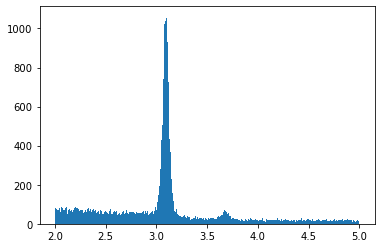

In [2]:
plt.hist(inv_massa, bins=500)
plt.show()

Nu vill vi undersöka området kring den stora piken. Vi avgränsar de närmsta värdena och sparar dem som en variabel 'pikdata' och sparar de motsvarande invarianta massorna som 'pik_invmassa'

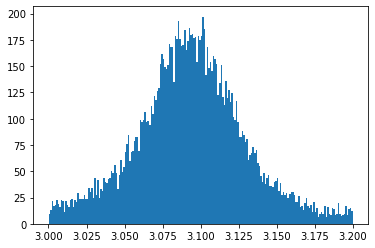

In [3]:
pikdata = dataset[(inv_massa>3.0) & (inv_massa<3.2)] # Vi ser att piken ligger ungefär vid 3.1, så vi sätter gränserna nära.
pik_invmassa = pikdata['M']
plt.hist(pik_invmassa, bins=200)
plt.show()

### Medeltal $\bar x$

Medeltalsberäkning går smidigt i python genom att vi använder **numpy**-paketets **mean()**-funktion. Vi beräknar ett medeltal för datasetet med alla invarianta massor.

In [4]:
medeltal = np.mean(inv_massa)
print(medeltal)

3.084373634453779


Vi jämför detta medeltal med medeltalet för *'pik_invmassa'*

In [5]:
pik_medeltal = np.mean(pik_invmassa)
print(pik_medeltal)

3.0934255293362796


### Varians $\sigma^2$

Variansen är ett mått på värdenas spridning. En låg varians innebär att värdena är koncentrerade. En hög varians innebär att värdena är mycket spridda. Det finns en formel för hur vi beräknar varians: $$\sigma^2 = \frac{\sum_{i=1}^{n}(x_i-\bar{x})^2}{n}.$$

Python gör detta arbete lättare. Vi kan berälkna variansen för ett dataset genom att använda **numpy**s funktion **var()**. Vi beräknar variansen för alla invarianta massor.

In [6]:
varians = np.var(inv_massa)
print(varians)

0.39216919088955843


...och så gör vi samma beräkning i området nära piken.

In [8]:
pik_varians = np.var(pik_invmassa)
print(pik_varians)

0.0012908143684854008


### Standardavvikelse $\sigma$

Standardavvikelsen är också ett mått på spridning, och beräknas som kvadratroten av variansen. För att beräkna den använder vi **numpy**s funktion **sqrt()**:

In [9]:
standardavvikelse = np.sqrt(varians)
print(standardavvikelse)

0.6262341342417853


...och i pikens närområde.

In [10]:
pik_standardavvikelse = np.sqrt(pik_varians)
print(pik_standardavvikelse)

0.03592790515025056


Vi märker att spridningsmåtten har mycket större värden när vi använder det dataset som inte var begränsat, medan båda dataseten gav nästan samma medeltal.